In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [83]:
df = pd.read_csv(r"C:\Python batch 427 innomatics\Project 1\final_Ac_data.csv",)
df.columns
# In This step i have imported the csv file from the scrapped Data

Index(['Brand', 'Model_Year', 'Capacity', 'Star_Rating', 'Inverter_Type',
       'Rating', 'Annual_Power', 'Room_size', 'Warranty', 'Original_Price',
       'Dicount_Pct', 'Price_After_Discount'],
      dtype='object')

In [84]:
req_columns= ['Brand', 'Model_Year', 'Capacity', 'Star_Rating',
       'Inverter_Type', 'Rating', 'Annual_Power', 'Room_size', 'Warranty',
       'Original_Price', 'Dicount_Pct', 'Price_After_Discount']
df = df[req_columns]
df
# This is the DataFrame we are going to perform Data Cleaning and Analysis and Visualizations.

,Brand,Model_Year,Capacity,Star_Rating,Inverter_Type,Rating,Annual_Power,Room_size,Warranty,Original_Price,Dicount_Pct,Price_After_Discount
0,IFB 2025,2025.0,1 Ton,3 Star,Star Split Inverter,4.0,657.31 Units,90,1 Year on Product,"₹48,849",46,"₹25,990"
1,Voltas 2024,2024.0,1 Ton,5 Star,Star Split Inverter,4.2,511.13 Units,90,NaN,"₹63,990",48,"₹32,800"
2,Voltas 2024,2024.0,1.5 Ton,3 Star,Star Split Inverter,4.2,975.26 Units,111 - 150,NaN,"₹57,990",47,"₹30,390"
3,Godrej 2025,2025.0,1.5 Ton,3 Star,Star Split Inverter,4.0,951.91 Units,111 - 150,5 Years Warranty on Whole Product,"₹42,300",33,"₹27,990"
4,realme TechLife,2025.0,1 Ton,3 Star,Star Split Inverter,4.2,684.78 Units,90,1 Year Warranty on Product,"₹47,899",54,"₹21,990"
...,...,...,...,...,...,...,...,...,...,...,...,...
959,Hitachi 1,NaN,['1.5 Ton'],3 Star,Star Split Inverter,4.0,536.2 Units,90,1 Year Warranty on Product,"₹45,900",45,"₹33,999"
960,Midea 2025,2025.0,['1.5 Ton'],3 Star,Star Split Inverter,4.3,789.6 Units,111 - 150,1 Year on Product,"₹54,700",51,"₹27,990"
961,CARRIER 2025,2025.0,['1 Ton'],5 Star,Star Split Inverter,4.1,758.6 Units,151 - 200,NaN,"₹63,500",47,"₹31,990"
962,Haier 2024,2024.0,['1.6 Ton'],5 Star,Star Split Inverter,4.2,541.48 W,90,1 Year Comprehensive Warranty on Product,"₹60,500",42,"₹43,650"


### information about data

In [85]:
df.info()
# Here we can see the whole information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 964 non-null    object 
 1   Model_Year            701 non-null    float64
 2   Capacity              964 non-null    object 
 3   Star_Rating           955 non-null    object 
 4   Inverter_Type         955 non-null    object 
 5   Rating                964 non-null    float64
 6   Annual_Power          964 non-null    object 
 7   Room_size             963 non-null    object 
 8   Warranty              782 non-null    object 
 9   Original_Price        964 non-null    object 
 10  Dicount_Pct           964 non-null    int64  
 11  Price_After_Discount  964 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 90.5+ KB


### Brand column cleaning

In [86]:
df['Brand'].unique()
# Here we are checking for unique values in the Brand column

array(['IFB 2025', 'Voltas 2024', 'Godrej 2025', 'realme TechLife',
       'MarQ by', 'Voltas 2023', 'Blue Star', 'Panasonic 2025',
       'Samsung 2025', 'Midea 2025', 'Lloyd 2023', 'CARRIER 2025',
       'Lloyd 1', 'Daikin 2024', 'Oakter 0', 'Lloyd 2024',
       'Panasonic 2024', 'Lloyd 2025', 'LG 2025', 'Haier 2025',
       'ONIDA 2024', 'Mitsubishi Electric', 'Sharp 2025', 'ONIDA 2025',
       'TCL 2025', 'Whirlpool 2024', 'Haier 2024', 'Haier 1', 'LG AI',
       'MOTOROLA 2025', 'Lloyd Stellar', 'Hitachi 2025', 'Hitachi 1',
       'Voltas 2', 'Godrej 1', 'Panasonic 1', 'Voltas 1', 'General 1',
       'Daikin 2025', 'MOTOROLA 1', 'Daikin 1', 'Hitachi 2024',
       'Acerpure 1', 'Panasonic 0', 'Daikin by', 'Godrej 2023',
       'Whirlpool Convertible', 'Thomson 4', 'Godrej Turbo', 'IFB 1',
       'Panasonic Convertible', 'Samsung Convertible', 'Thomson 2023',
       'MITASHI 1', 'Samsung 1', 'CARRIER Dust', 'Whirlpool 2023',
       'Hitachi 2023', 'Sansui 2023', 'Godrej 5', 'Haier F

In [87]:
brands = ["realme TechLife","Blue Star","Mitsubishi Electric"]
# These are the only brands that contain two words so we keep it separately.

In [88]:
brand = []
for i in df['Brand']:
    if i in brands:
        brand.append(i)
    else:
        brand.append(i.split(" ")[0])
    # In This we are splitting the brand name and year separately and append into brand column .

In [89]:
df['Brand'] = brand

In [90]:
df['Brand'].value_counts()
# Here we are checking the no of products that each brand consists of.

Brand
Midea                  161
Voltas                 129
Godrej                 115
Blue Star               73
IFB                     55
Lloyd                   54
CARRIER                 49
Hitachi                 46
Daikin                  43
Panasonic               41
Haier                   34
LG                      31
Samsung                 27
Whirlpool               22
General                 14
MarQ                    11
realme TechLife          9
ONIDA                    8
Sharp                    5
MOTOROLA                 4
TCL                      4
TOSHIBA                  4
Mitsubishi Electric      3
Sansui                   3
Acerpure                 3
Electrolux               2
Thomson                  2
DECKER                   2
Admiral                  2
Oakter                   1
MITASHI                  1
InnoQ                    1
BPL                      1
Frigidaire               1
5                        1
Equator                  1
Hisense               

### Model_year column cleaning

In [91]:
df['Model_Year'].value_counts()
# Here we are checking the no of products that each Year consists of.

Model_Year
2025.0    414
2024.0    197
2023.0     90
Name: count, dtype: int64

In [92]:
df['Model_Year'].mode().values[0]
# In this step we are finding out mode of model year.

np.float64(2025.0)

In [93]:
df['Model_Year'].isna().sum()
# Here we are checking for null values in Model Year.

np.int64(263)

In [94]:
df['Model_Year']= df['Model_Year'].replace(3400.0,np.nan)
# we have an inappropriate value so we are replacing with np.nan which is a null value.

In [95]:
df['Model_Year'] = df['Model_Year'].fillna(df['Model_Year'].mode().values[0])
# Here we are replacing null values with mode of model year.

In [96]:
df['Model_Year'].value_counts()

Model_Year
2025.0    677
2024.0    197
2023.0     90
Name: count, dtype: int64

In [97]:
df['Model_year'] = df['Model_Year'].astype("O")
df['Model_Year'].value_counts()

Model_Year
2025.0    677
2024.0    197
2023.0     90
Name: count, dtype: int64

#### Capacity column cleaning

In [98]:
df['Capacity'].value_counts()

Capacity
['1.5 Ton']           488
['1 Ton']             291
['2 Ton']              56
['1.4 Ton']            39
['0.8 Ton']            23
['1.8 Ton']            14
1.5 Ton                12
['1.6 Ton']             9
1 Ton                   7
['1.2 Ton']             5
['2.02 Ton']            3
['0.9 Ton']             3
['0.5 Ton']             1
1.4 Ton                 1
0.8 Ton                 1
0.6 Ton                 1
2.5 Ton                 1
2 Ton                   1
['1.25 Ton']            1
['1.3 Ton']             1
['2.5 Ton']             1
['2.6 Ton']             1
['1 Ton', '1 Ton']      1
['1.7 Ton']             1
['2.2 Ton']             1
['0.75 Ton']            1
Name: count, dtype: int64

In [99]:
df["Capacity"].value_counts()

Capacity
['1.5 Ton']           488
['1 Ton']             291
['2 Ton']              56
['1.4 Ton']            39
['0.8 Ton']            23
['1.8 Ton']            14
1.5 Ton                12
['1.6 Ton']             9
1 Ton                   7
['1.2 Ton']             5
['2.02 Ton']            3
['0.9 Ton']             3
['0.5 Ton']             1
1.4 Ton                 1
0.8 Ton                 1
0.6 Ton                 1
2.5 Ton                 1
2 Ton                   1
['1.25 Ton']            1
['1.3 Ton']             1
['2.5 Ton']             1
['2.6 Ton']             1
['1 Ton', '1 Ton']      1
['1.7 Ton']             1
['2.2 Ton']             1
['0.75 Ton']            1
Name: count, dtype: int64

In [100]:
df['Capacity']= df['Capacity'].str.replace(r"[\[\]']","",regex=True).str.strip()
df['Capacity'] = df['Capacity'].apply(lambda x: str(x).split(" ")[0])

In [101]:
df[df['Capacity'] == ""]

,Brand,Model_Year,Capacity,Star_Rating,Inverter_Type,Rating,Annual_Power,Room_size,Warranty,Original_Price,Dicount_Pct,Price_After_Discount,Model_year


In [102]:
df['Capacity']= df['Capacity'].replace("",np.nan)

In [103]:
df['Capacity'] = df['Capacity'].fillna(df["Capacity"].mode().values[0])

In [104]:
df["Capacity"].value_counts()

Capacity
1.5     500
1       299
2        57
1.4      40
0.8      24
1.8      14
1.6       9
1.2       5
0.9       3
2.02      3
2.5       2
0.6       1
0.5       1
1.3       1
1.25      1
2.6       1
1.7       1
2.2       1
0.75      1
Name: count, dtype: int64

#### star rating column

In [105]:
df['Star_Rating'].value_counts()

Star_Rating
3 Star    559
5 Star    362
4 Star     24
2 Star      8
1 Star      2
Name: count, dtype: int64

In [106]:
df['Star_Rating'] = df['Star_Rating'].fillna(df['Star_Rating'].mode().values[0])

In [107]:
star = []
for i in df['Star_Rating']:
    a = i.split(" ")[0]
    star.append(a)

In [108]:
df['Star_Rating'] = star

In [109]:
df['Star_Rating'].value_counts()

Star_Rating
3    568
5    362
4     24
2      8
1      2
Name: count, dtype: int64

### Rating column cleaning

In [110]:
df['Rating'].value_counts()

Rating
4.2    346
4.0    184
4.1    180
4.3    152
3.8     55
3.9     15
3.1      5
3.5      4
3.6      4
2.3      3
4.4      3
3.2      2
2.7      2
1.3      2
2.0      1
3.7      1
4.5      1
3.4      1
4.7      1
5.0      1
4.8      1
Name: count, dtype: int64

### Annual power column 

In [111]:
power = []

In [112]:
for i in df['Annual_Power']:
    power.append(str(i).split(" ")[0])

In [113]:
df['Annual_Power'] = power

In [114]:
df['Annual_Power'] = df['Annual_Power'].astype("float")

In [115]:
df['Annual_Power'].isna().sum()

np.int64(0)

In [116]:
df['Annual_Power'] = df['Annual_Power'].fillna(df['Annual_Power'].mean())

In [117]:
mean = df['Annual_Power'].mean()

In [118]:
df['Annual_Power'] = df['Annual_Power'].replace(0.0,mean)
df['Annual_Power'].describe()

count     964.000000
mean      862.586137
std       357.934676
min       101.200000
25%       685.180000
50%       789.600000
75%       965.900000
max      5800.000000
Name: Annual_Power, dtype: float64

### Room size column cleaning

In [119]:
df['Room_size'].value_counts()

Room_size
111 - 150    542
90           333
151 - 200     83
91 - 110       5
Name: count, dtype: int64

In [120]:
df['Room_size'].isna().sum()

np.int64(1)

In [121]:
df['Room_size'].mode().values[0]

'111 - 150'

In [122]:
df['Room_size'] = df['Room_size'].fillna(df['Room_size'].mode().values[0])
df['Room_size'].value_counts()

Room_size
111 - 150    543
90           333
151 - 200     83
91 - 110       5
Name: count, dtype: int64

### warranty column cleaning

In [123]:
df['Warranty'].isna().sum()

np.int64(182)

In [124]:
df['Warranty'] = df['Warranty'].fillna(df['Warranty'].mode()[0])

In [125]:
df['Warranty'] = df['Warranty'].str.strip()
df['Warranty'].value_counts()

Warranty
1 Year Warranty on Product                   468
(1 Year Standard                             162
5 Years Warranty on Whole Product             94
1 Year on Product                             88
1 Year Comprehensive Warranty on Product      74
1 Year Comprehensive Warranty on AC           19
5 years comprehensive warranty on product     17
1 Year Standard Warranty on Product            8
1 Year Warranty on the Product                 4
1 Years Warranty On Product                    3
5 Years Warranty on Product                    3
1 Year warranty on Product                     2
5 Years on the Product                         2
5 years on Product                             2
5 Years Comprehensive Warranty on Product      2
3 Years on Product                             2
1 Year On Product                              2
1 year Warranty on Product                     2
1 year warranty on whole product               2
5 Year Warranty on Product                     1
1 Year Dome

In [126]:
df['Warranty'] = df['Warranty'].apply(lambda x: str(x).split(" ")[0])
df['Warranty'].value_counts()

Warranty
1     677
(1    162
5     122
3       2
2       1
Name: count, dtype: int64

In [127]:
df['Warranty'] = df['Warranty'].replace("(1",1)
df['Warranty'].value_counts()

Warranty
1    677
1    162
5    122
3      2
2      1
Name: count, dtype: int64

In [128]:
df['Warranty'] = df['Warranty'].astype('int')
df['Warranty'].value_counts()

Warranty
1    839
5    122
3      2
2      1
Name: count, dtype: int64

#### original price column

In [129]:
# df['Original_Price'] =
df['Original_Price'].apply(lambda x: str(x).split("₹"))

0      [, 48,849]
1      [, 63,990]
2      [, 57,990]
3      [, 42,300]
4      [, 47,899]
          ...    
959    [, 45,900]
960    [, 54,700]
961    [, 63,500]
962    [, 60,500]
963    [, 43,499]
Name: Original_Price, Length: 964, dtype: object

In [130]:
original = []
for i in df['Original_Price']:
    a = str(i).split("₹")
    if len(a) > 1:
        original.append(a[1].replace(",",""))
    else:
        original.append(a[0])

In [131]:
df['Original_Price'] = original

In [132]:
df['Original_Price'] = df['Original_Price'].astype("float")
df['Original_Price'].describe()

count       964.000000
mean      58805.556017
std       12892.301239
min       27499.000000
25%       48849.000000
50%       57400.000000
75%       66025.000000
max      115230.000000
Name: Original_Price, dtype: float64

In [133]:
df['Original_Price'].isna().sum()

np.int64(0)

In [134]:
df['Original_Price'] = df['Original_Price'].fillna(df['Original_Price'].median())
df['Original_Price'].describe()

count       964.000000
mean      58805.556017
std       12892.301239
min       27499.000000
25%       48849.000000
50%       57400.000000
75%       66025.000000
max      115230.000000
Name: Original_Price, dtype: float64

### Discount column

In [135]:
df['Dicount_Pct'].isna().sum()

np.int64(0)

#### price after discount column

In [136]:
df["Price_After_Discount"] = df['Price_After_Discount'].apply(lambda x: str(x).split("₹")[1].replace(",",""))

In [137]:

df['Price_After_Discount'] = df['Price_After_Discount'].astype("int")
df['Price_After_Discount'].describe()

count      964.000000
mean     34487.280083
std       9127.651938
min      16999.000000
25%      27990.000000
50%      32800.000000
75%      37460.250000
max      89990.000000
Name: Price_After_Discount, dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 964 non-null    object 
 1   Model_Year            964 non-null    float64
 2   Capacity              964 non-null    object 
 3   Star_Rating           964 non-null    object 
 4   Inverter_Type         955 non-null    object 
 5   Rating                964 non-null    float64
 6   Annual_Power          964 non-null    float64
 7   Room_size             964 non-null    object 
 8   Warranty              964 non-null    int64  
 9   Original_Price        964 non-null    float64
 10  Dicount_Pct           964 non-null    int64  
 11  Price_After_Discount  964 non-null    int64  
 12  Model_year            964 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 98.0+ KB


In [139]:
df

,Brand,Model_Year,Capacity,Star_Rating,Inverter_Type,Rating,Annual_Power,Room_size,Warranty,Original_Price,Dicount_Pct,Price_After_Discount,Model_year
0,IFB,2025.0,1,3,Star Split Inverter,4.0,657.31,90,1,48849.0,46,25990,2025.0
1,Voltas,2024.0,1,5,Star Split Inverter,4.2,511.13,90,1,63990.0,48,32800,2024.0
2,Voltas,2024.0,1.5,3,Star Split Inverter,4.2,975.26,111 - 150,1,57990.0,47,30390,2024.0
3,Godrej,2025.0,1.5,3,Star Split Inverter,4.0,951.91,111 - 150,5,42300.0,33,27990,2025.0
4,realme TechLife,2025.0,1,3,Star Split Inverter,4.2,684.78,90,1,47899.0,54,21990,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Hitachi,2025.0,1.5,3,Star Split Inverter,4.0,536.20,90,1,45900.0,45,33999,2025.0
960,Midea,2025.0,1.5,3,Star Split Inverter,4.3,789.60,111 - 150,1,54700.0,51,27990,2025.0
961,CARRIER,2025.0,1,5,Star Split Inverter,4.1,758.60,151 - 200,1,63500.0,47,31990,2025.0
962,Haier,2024.0,1.6,5,Star Split Inverter,4.2,541.48,90,1,60500.0,42,43650,2024.0


In [140]:
df['Inverter_Type'].value_counts()

Inverter_Type
Star Split Inverter       826
Star Split AC              40
Star Window AC             27
Star Split Dual            18
Star Window Inverter       14
Star Split AI               9
Star Hot and                6
Star Split Triple           3
Star Window with            2
Star Split Air              2
Star Split with             2
Star Split With             1
Star Split Inver            1
Star Split Powerful         1
Star Split Hot              1
Star Cassette Inverter      1
Star Window Dual            1
Name: count, dtype: int64

In [141]:
df['Inverter_Type'] = df['Inverter_Type'].replace("Star Split with","Star Split With").replace("Star Split Inver","Star Split Inverter")

In [142]:
df['Inverter_Type'].mode().values[0]

'Star Split Inverter'

In [143]:
df['Inverter_Type'] = df['Inverter_Type'].fillna(df['Inverter_Type'].mode().values[0])

In [144]:
df['Original_Price'] = df['Original_Price'].astype('int')

In [145]:
df['Model_Year'] = df['Model_Year'].astype('int')

In [146]:
df = df.drop(columns='Model_year')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 964 non-null    object 
 1   Model_Year            964 non-null    int64  
 2   Capacity              964 non-null    object 
 3   Star_Rating           964 non-null    object 
 4   Inverter_Type         964 non-null    object 
 5   Rating                964 non-null    float64
 6   Annual_Power          964 non-null    float64
 7   Room_size             964 non-null    object 
 8   Warranty              964 non-null    int64  
 9   Original_Price        964 non-null    int64  
 10  Dicount_Pct           964 non-null    int64  
 11  Price_After_Discount  964 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [148]:
df['Capacity'] = df['Capacity'].astype('float')
df['Star_Rating'] = df['Star_Rating'].astype('int')

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 964 non-null    object 
 1   Model_Year            964 non-null    int64  
 2   Capacity              964 non-null    float64
 3   Star_Rating           964 non-null    int64  
 4   Inverter_Type         964 non-null    object 
 5   Rating                964 non-null    float64
 6   Annual_Power          964 non-null    float64
 7   Room_size             964 non-null    object 
 8   Warranty              964 non-null    int64  
 9   Original_Price        964 non-null    int64  
 10  Dicount_Pct           964 non-null    int64  
 11  Price_After_Discount  964 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 90.5+ KB


In [150]:
df.to_csv("Cleaned_Ac_data.csv")

## Data Analysis And  visualizations  

# Problem Statement
- Flipkart hosts a wide range of Air Conditioners from various brands, but inconsistent and unstructured product data limits effective comparison of      prices, features, and ratings. This hinders customer decision-making, leading to reduced satisfaction and potential loss in sales opportunities.

# Univariate Analysis

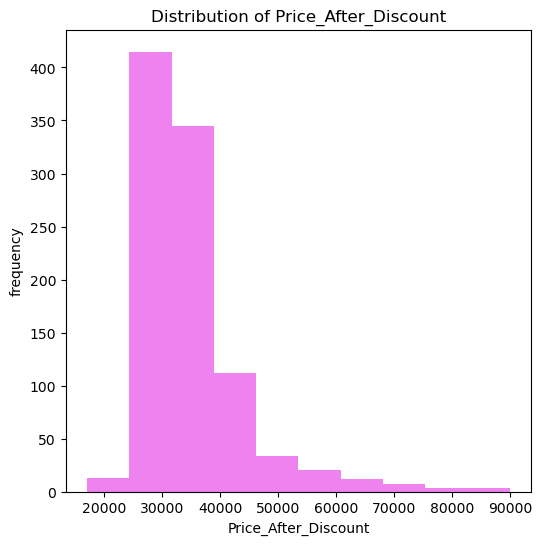

In [152]:
plt.figure(figsize=(6,6))
plt.hist(df['Price_After_Discount'],bins=10,color='violet')
plt.xlabel('Price_After_Discount')
plt.ylabel('frequency')
plt.title('Distribution of Price_After_Discount')
plt.show()

- In the above Plot we can observe the distribution of the Price_After_Discount of AC's that lies between 25000-45000.
- we can observe that AC's which are above 60000 are very less and these can be considered under expensive category.

C:\Users\dines\AppData\Local\Temp\ipykernel_10184\3119258755.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Star_Rating'],palette='pastel')


Text(0.5, 1.0, 'count of star_rating')

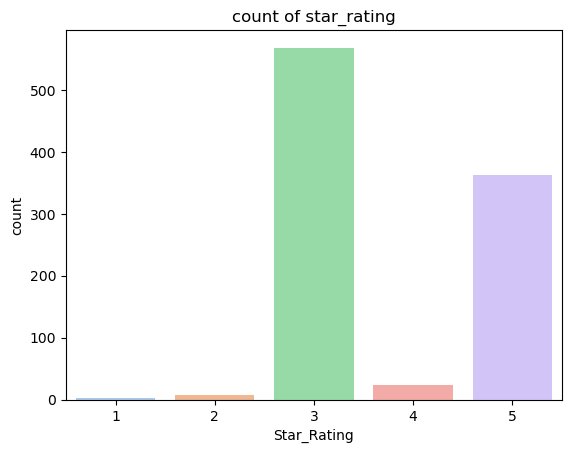

In [190]:
sns.countplot(x=df['Star_Rating'],palette='pastel')
plt.title('count of star_rating')

- In this count plot we can observe that most of the AC's are having 3 and 5 star energy rating that shows the impact on power usage.

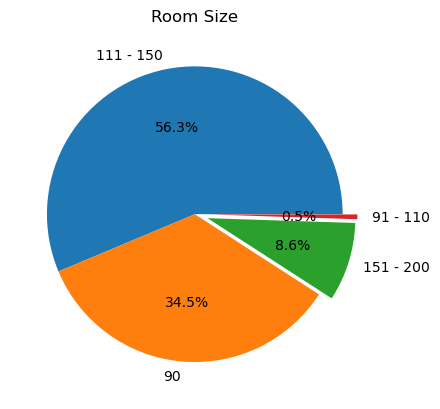

In [254]:
plt.pie(df['Room_size'].value_counts(),
        labels=df['Room_size'].value_counts().index,
        autopct='%.1f%%',
        explode=[0,0,0.09,0.1],startangle=0
       )
plt.title('Room Size')
plt.show()


- In this plot we can observe the percentages of Room-Size that are compatible for the AC's Performance.

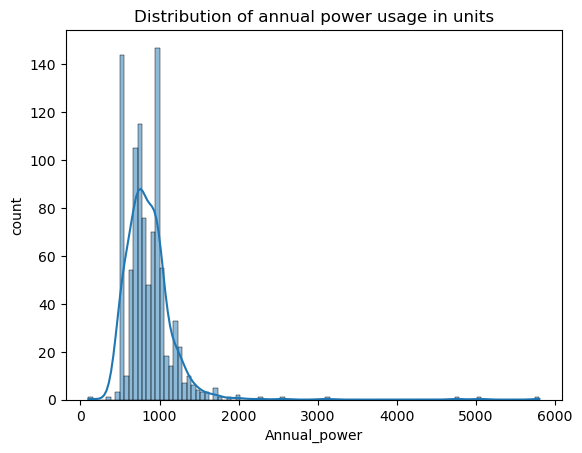

In [218]:
sns.histplot(df['Annual_Power'],kde=True)
plt.title("Distribution of annual power usage in units")
plt.xlabel("Annual_power")
plt.ylabel("count")
plt.show()

-  In the above plot we can observe Distribution of annual power usage in units it is positively skewed and the most of the Ac's power consumption lies between 500 - 1500 and there are only few Ac's which cosumpts more power greater than 2000 units annually .

# Bi Variate Analysis

Text(0.5, 1.0, 'Brand VS Price_After_Discount')

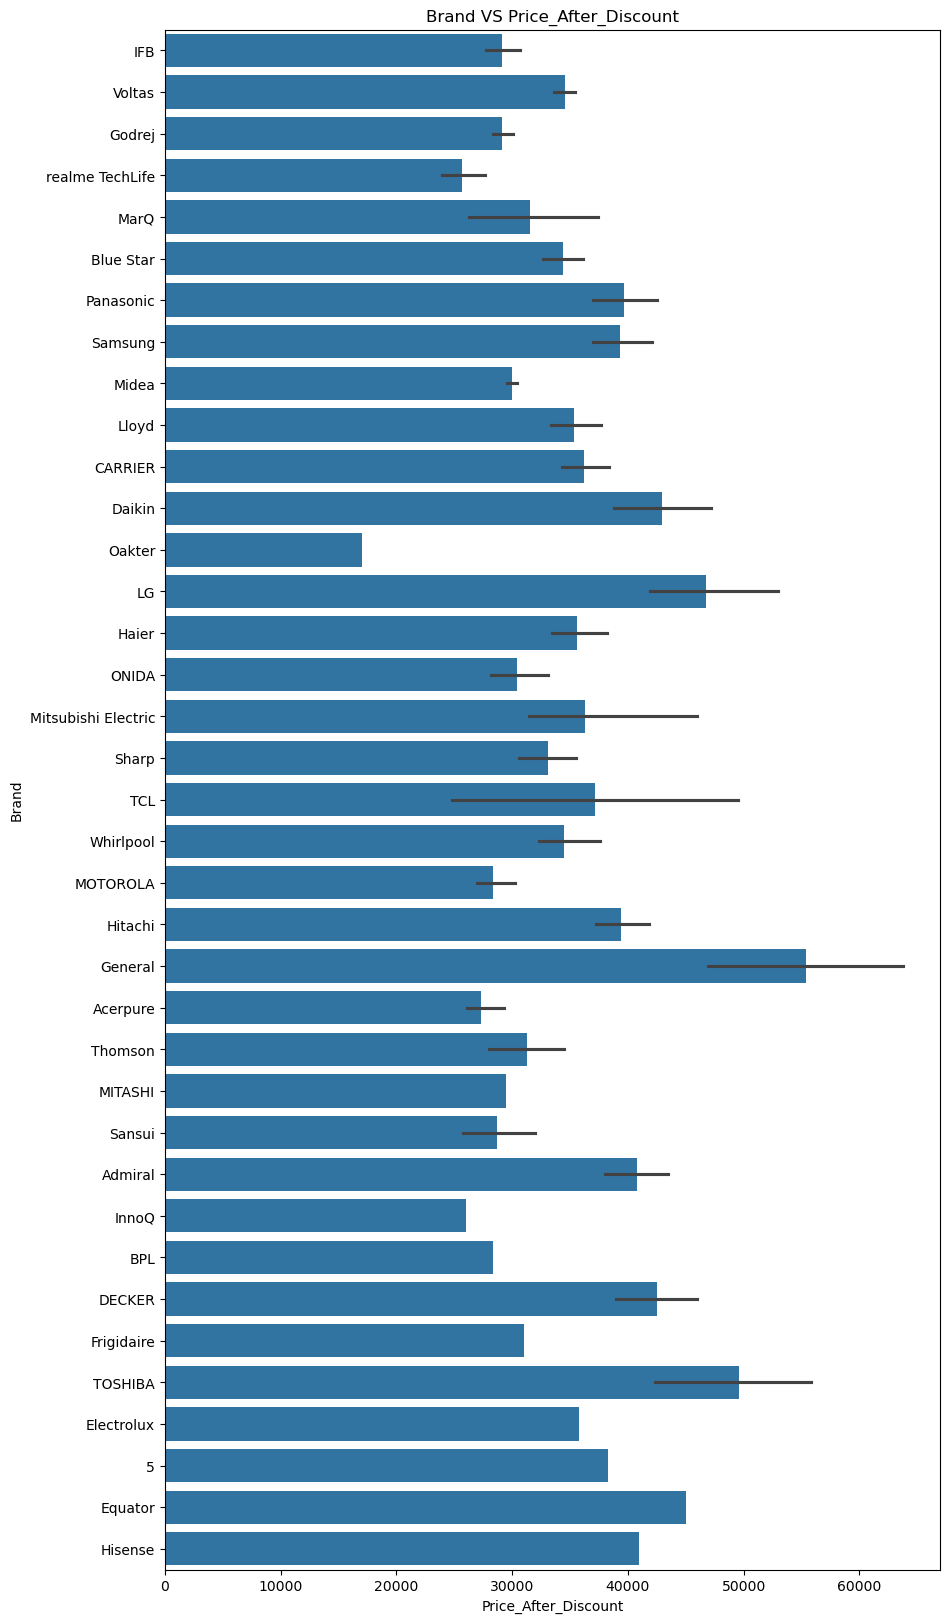

In [259]:
plt.figure(figsize=(10,20))
sns.barplot(data=df,y='Brand',x='Price_After_Discount')
plt.title('Brand VS Price_After_Discount')

- In the above plot we can observe that few Brands like General,Toshiba,LG,Daikin,Admiral are costlier as compared to Remaining Brands ,so if try to provide more discounts or any other offers on these Brands we can see a huge raise in these brands also.

<Axes: xlabel='Rating', ylabel='Price_After_Discount'>

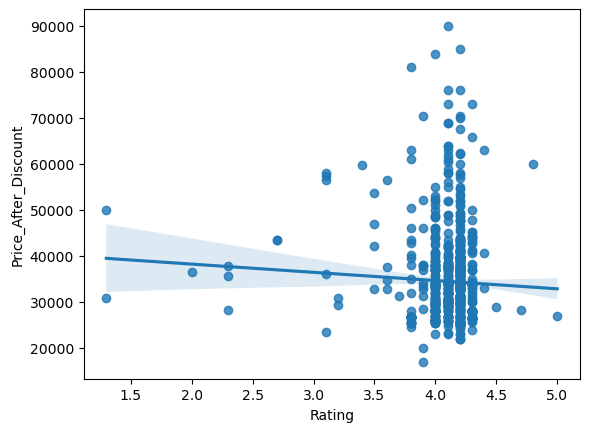

In [211]:
sns.regplot(data=df,x='Rating',y='Price_After_Discount')

- In this  plot we can observe that the Ac's which are priced between 25000-60000 maximum of them having ratings in between 4.0-4.5 if improve the efficiency of the Ac's and also improve  the Factors which are effecting the rating so we can improve the sales of Ac's Based on that.

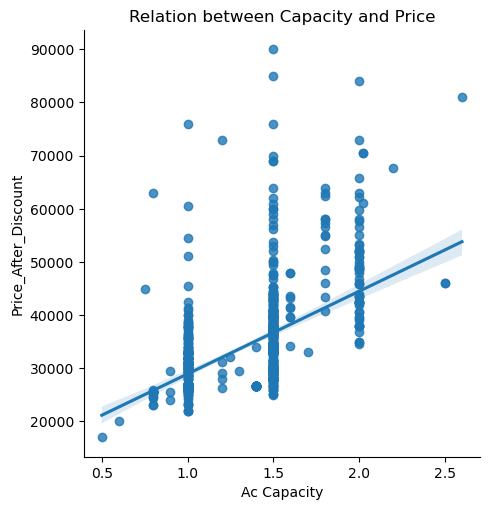

In [221]:
sns.lmplot(data=df,y='Price_After_Discount',x='Capacity')
plt.title("Relation between Capacity and Price")
plt.xlabel("Ac Capacity")
plt.ylabel("Price_After_Discount")
plt.show()

- In this plot we can observe that the relation line is positvely increasing from this we understand as the Capacity  is incresing the price is also incresing.To improve sales we can market based on capacity as 1 ton ac's are budget friendly and cosumes less power , 1.5 are used for medium spaces and gives powerfull cooling and 2 - 2.5 ac's are used in large spaces and gives powerful cooling compared to other capacity ac's. 

C:\Users\dines\AppData\Local\Temp\ipykernel_10184\3070234170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,y='Annual_Power',x='Room_size',palette='pastel')


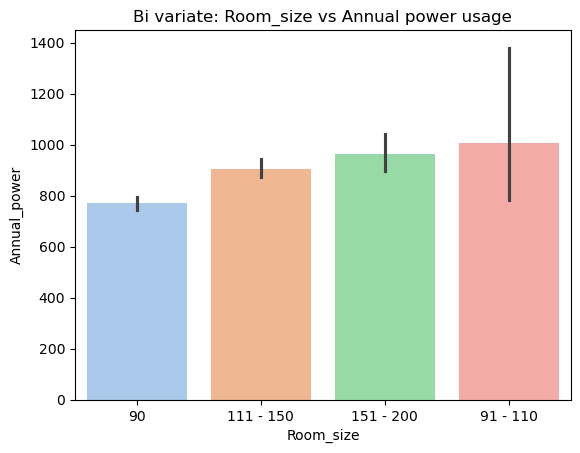

In [240]:
sns.barplot(data = df,y='Annual_Power',x='Room_size',palette='pastel')
plt.title("Bi variate: Room_size vs Annual power usage")
plt.xlabel("Room_size")
plt.ylabel("Annual_power")
plt.show()

- In this plot we can observe relation between Annual power usage and RoomSize . We can observe that annual power usage is not based on the Room Size
- we can suggest the  Ac's manufacturers to Build Ac's that  cosume power based on the room size
- This is also one of the factor that is affecting the sales.

### Multi_variate analysis

<Axes: >

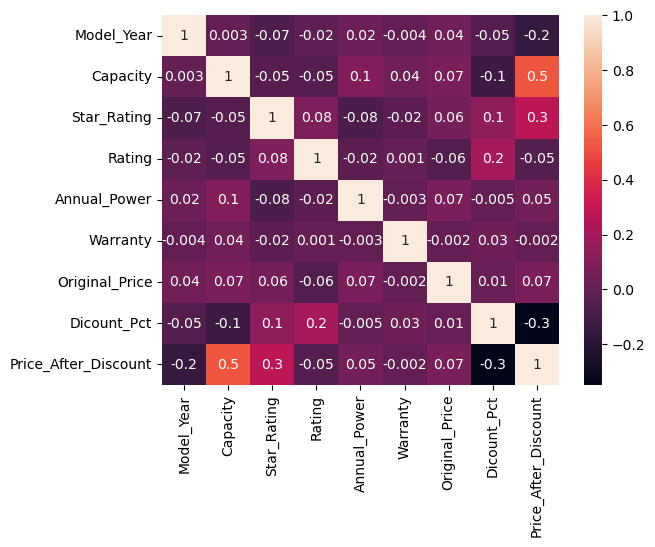

In [245]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.1g')

- This plot shows relation between all numerical columns present in the data
- From the correlation heatmap, we can see that AC capacity has a strong positive correlation with price.
-  while discount percentage shows a negative correlation, indicating that larger capacity models are priced higher and discounts significantly reduce the final price.
-  Based on the negative relation we should provide dicounts on larger capacity models so it might help in sales.

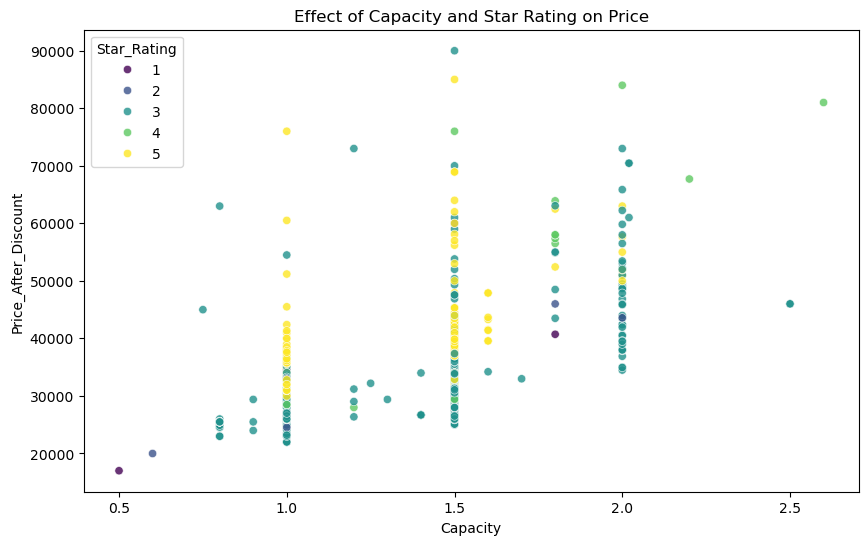

In [249]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Capacity', y='Price_After_Discount', 
                hue='Star_Rating', data=df, palette='viridis', alpha=0.8)
plt.title('Effect of Capacity and Star Rating on Price')
plt.show()


- The plot shows that AC price increases with capacity, and within each capacity, higher star-rated models tend to have slightly higher prices, reflecting the added value of energy efficiency.
- To improve sales ,we have to focus on promoting energy-efficiency based on star rating and also prove offers and high lighting the long term savings.

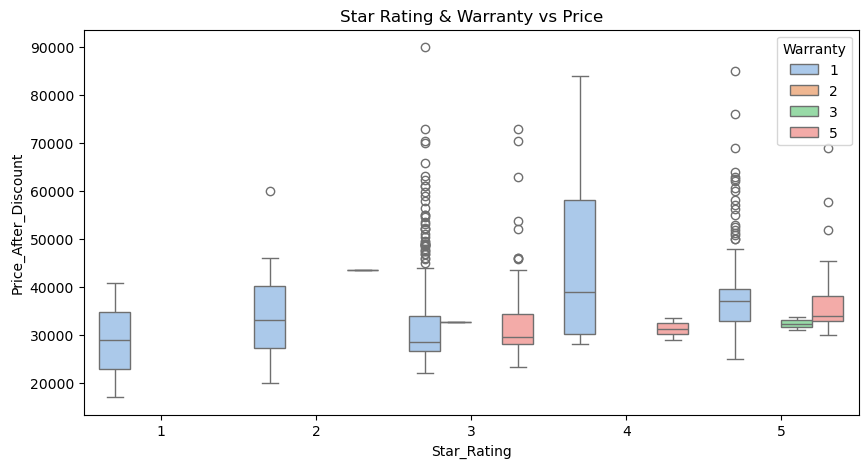

In [253]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Star_Rating', y='Price_After_Discount', hue='Warranty', data=df,palette='pastel')
plt.title('Star Rating & Warranty vs Price')
plt.show()


- The plot shows that higher star ratings and longer warranties are associated with higher prices, suggesting that promoting energy efficiency along with extended warranty offers can effectively boost customer trust and sales.